## Logistic Regression

- Data Preparation
- Visualization
- Create Train adn Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary

In [52]:
import numpy as np
import matplotlib.pyplot as plt

### Dumy Data Generation

In [53]:
## Suppose there are two clusters and two features


# For cluster0
mean0 = np.array([1, 0.5])
covariance0 = np.array([[1, 0.1], [0.1, 1.2]])

# For cluster1
mean1 = np.array([4, 5])
covariance1 = np.array([[1.2, 0.1],[0.1, 1.3]])

In [54]:
class0 = np.random.multivariate_normal(mean0, covariance0, size = 500)
class1 = np.random.multivariate_normal(mean1, covariance1, size = 500)

In [55]:
class0.shape, class1.shape # These are two datasets belongs to two different classes

((500, 2), (500, 2))

### Visualization

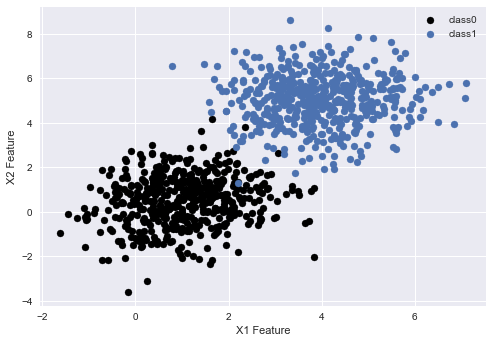

In [56]:
plt.style.use("seaborn")
plt.scatter(x = class0[:, 0], y = class0[:, 1], color = "black", label = "class0")
plt.scatter(x = class1[:, 0], y = class1[:, 1], label = "class1")
plt.xlabel("X1 Feature")
plt.ylabel("X2 Feature")
plt.legend();

In [57]:
### Preparing Dataset

In [58]:
dataset = np.vstack((class0, class1)) # One below another

In [59]:
dataset.shape

(1000, 2)

In [60]:
# Now need to add column Y as well

#Preparing Y
Y = np.zeros((1000, 1))
Y[501:] = 1

dataset = np.hstack((dataset, Y)) # Stacking it horizontally

In [61]:
dataset[:4, :]

array([[1.01798894, 1.69631294, 0.        ],
       [1.05480517, 0.63899871, 0.        ],
       [0.76145358, 0.22343301, 0.        ],
       [1.19921282, 0.93625062, 0.        ]])

In [62]:
# Shuffle whole dataset

np.random.shuffle(dataset)

In [63]:
dataset[:4, :]

array([[ 2.10022859,  1.17742418,  0.        ],
       [ 4.0826437 ,  6.55472327,  1.        ],
       [ 0.42573578,  0.79209035,  0.        ],
       [-0.22452308,  1.93130635,  0.        ]])

### Prepare Training and Testing Data

In [65]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
Y_train = dataset[:split, -1]

X_test = dataset[split:, :-1]
Y_test = dataset[split:, -1]

In [66]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 2), (800,), (200, 2), (200,))

### Normalization

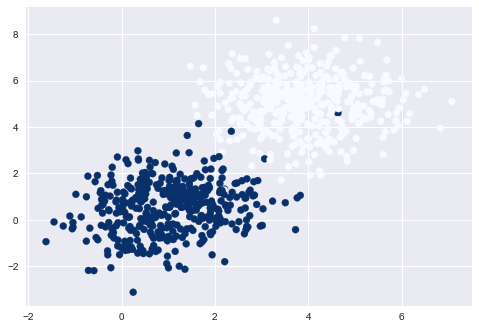

In [73]:
plt.scatter(X_train[:, 0], X_train[:,1], c = Y_train, cmap = plt.cm.Blues_r)
plt.show()

In [78]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

#Training Data

X_train = (X_train - x_mean)/x_std

#Testing Data : 
# No need to calcluate mean & std for testing data, use training data mean & std to deviate points exactly the same amount

X_test = (X_test - x_mean)/x_std

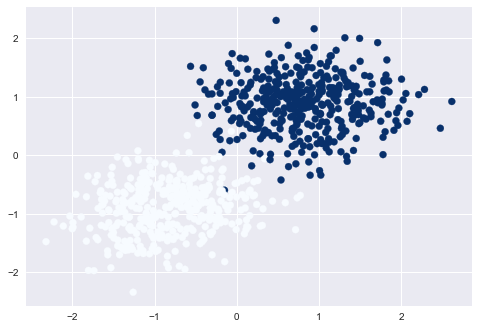

In [77]:
plt.scatter(X_train[:, 0], X_train[:, 1], c =Y_train, cmap = plt.cm.Blues);

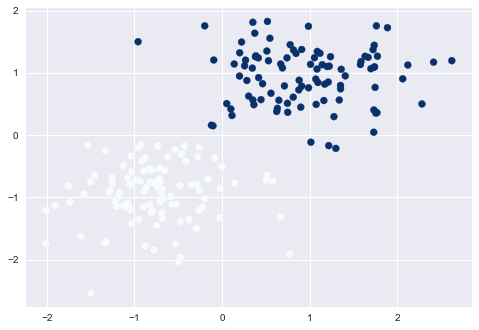

In [79]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, cmap = plt.cm.Blues);